In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
import math

In [ ]:
symbol = 'HPG'
date_milestone = '2021-01-01'

In [ ]:
url = f'https://raw.githubusercontent.com/bachbnt/learn-stock_prediction-python/v2/data/{symbol}.csv'
dataset_all = pd.read_csv(url)
dataset_all.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2014-12-04,4738.7,4781.8,4695.7,4738.7,3618911,VND
1,2014-12-05,4781.8,4824.9,4738.7,4781.8,7385177,VND
2,2014-12-08,4781.8,4781.8,4652.6,4695.7,4465640,VND
3,2014-12-09,4652.6,4695.7,4437.2,4480.3,10020174,VND
4,2014-12-10,4523.3,4609.5,4394.1,4566.4,5746274,VND


In [ ]:
dataset_train = dataset_all[dataset_all['Date'] < date_milestone]
dataset_test = dataset_all[dataset_all['Date'] >= date_milestone]

print(dataset_test.size)

2562


In [ ]:
training_set = dataset_train.iloc[:, 1:2].values
test_set = dataset_test.iloc[:, 1:2].values

# print(training_set)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60, len(dataset_train)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense 

In [ ]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
46/46 [==============================] - 13s 119ms/step - loss: 0.0176
Epoch 2/100
46/46 [==============================] - 6s 121ms/step - loss: 0.0034
Epoch 3/100
46/46 [==============================] - 5s 108ms/step - loss: 0.0028
Epoch 4/100
46/46 [==============================] - 6s 124ms/step - loss: 0.0026
Epoch 5/100
46/46 [==============================] - 5s 112ms/step - loss: 0.0025
Epoch 6/100
46/46 [==============================] - 8s 169ms/step - loss: 0.0027
Epoch 7/100
46/46 [==============================] - 5s 112ms/step - loss: 0.0023
Epoch 8/100
46/46 [==============================] - 5s 117ms/step - loss: 0.0022
Epoch 9/100
46/46 [==============================] - 5s 116ms/step - loss: 0.0023
Epoch 10/100
46/46 [==============================] - 6s 129ms/step - loss: 0.0020
Epoch 11/100
46/46 [==============================] - 7s 145ms/step - loss: 0.0019
Epoch 12/100
46/46 [==============================] - 7s 147ms/step - loss: 0.0022
Epoch 13/100

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
print(inputs)
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(inputs.size)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_set = model.predict(X_test)
predicted_set = sc.inverse_transform(predicted_set)

real_price = test_set.flatten()
predicted_price = predicted_set.flatten()

[15722.  15972.8 15722.  15582.6 16725.5 16279.5 16251.6 16028.6 16418.8
 16168.  16614.  17283.  17060.  17366.6 16697.6 17171.5 17032.1 17283.
 17115.7 17087.9 16892.7 17171.5 17896.3 17450.3 17450.3 17561.8 18007.8
 18119.3 18732.5 19345.8 19680.3 19903.3 21046.2 20516.6 19568.8 19513.1
 20210.  19457.3 19847.6 19819.7 20656.  20656.  21297.1 21464.4 21464.4
 21185.6 21966.1 21771.  21631.6 21408.6 21241.4 21743.1 21492.2 21994.
 22635.2 22300.6 23304.2 22997.5 23192.7 22802.4 23415.7 23304.2 23694.4
 24056.8 23917.4 24028.9 24084.7 25199.7 24921.  24698.  24809.5 24865.2
 23415.7 23889.6 24698.  24112.6 24307.7 23081.2 20962.6 20628.1 21743.1
 21464.4 22969.7 23415.7 23387.8 23694.4 22802.4 23666.6 24196.2 24140.4
 24224.1 24084.7 24335.6 24530.7 24363.5 25785.1 26091.8 25952.4 26147.5
 25450.6 25980.2 25645.7 25562.1 25590.  25980.2 25980.2 25980.2 25729.4
 26036.  25980.2 26370.5 26008.1 25673.6 25478.5 25367.  25924.5 25924.5
 25896.6 26203.3 27206.8 27597.  27485.5 27541.3 2759

In [ ]:
# Root Mean Square Error - RMSE
total = 0
n = len(real_price)
for i in range(n):
  total += math.pow(real_price[i] - predicted_price[i], 2)
rmse = math.sqrt(total/n)

# 5.3526*1000
# 1119.8980646153511
print(rmse)

1039.3994602657685


In [ ]:
# Mean Absolute Error - MAE
total = 0
n = len(real_price)
for i in range(n):
  total += abs(real_price[i] - predicted_price[i])
mae = total/n

# 4.0268*1000
# 885.3326075819674
print(mae)

885.3326075819674


In [ ]:
# Mean Absolute Percent Error MAPE
total = 0
n = len(real_price)
for i in range(n):
  total += abs(real_price[i] - predicted_price[i])/real_price[i]
mape = total/n

# 0.0168
# 0.027457068357071884
print(mape)

0.1576353579783943


In [ ]:
# Average Return - AR
total = 0
n = len(real_price)
for i in range(n - 1):
  if(predicted_price[i+1] > predicted_price[i]):
    total += real_price[i+1] - real_price[i]
ar = total/(n-1)

# -0.9632876712328429
print(ar)

-0.9632876712328429


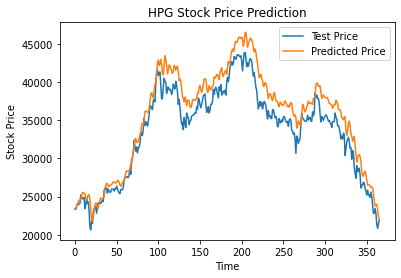

In [ ]:
# plt.plot(training_set, label = 'Training Price')
plt.plot(test_set, label = 'Test Price')
plt.plot(predicted_set, label = 'Predicted Price')
plt.title(f'{symbol} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# bổ sung thuế phí trong công thức tính lợi nhuận
# chạy sai số trên tập train => so sánh với tập test => overfit or underfit

In [ ]:
# Average Return - AR
# Thuế phí
total = 0
n = len(real_price)
for i in range(n - 1):
  if(predicted_price[i+1] > predicted_price[i]):
    tax_fee = real_price[i]*0.0015 + real_price[i+1]*0.0015 + real_price[i+1]*0.001
    total += real_price[i+1] - real_price[i] - tax_fee
ar = total/(n-1)

# -66.13681150684927
print(ar)

-66.13681150684927


In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[0:len(dataset_total) - len(dataset_test) + 60].values
print(inputs)
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_train = []
for i in range(60, len(inputs)):
    X_train.append(inputs[i-60:i, 0])
X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
predicted_set = model.predict(X_train)
predicted_set = sc.inverse_transform(predicted_set)

real_price = training_set.flatten()
predicted_price = predicted_set.flatten()

print(real_price.size)
print(predicted_price.size)

[ 4738.7  4781.8  4781.8 ... 25896.6 26203.3 27206.8]
48/48 [==============================] - 1s 29ms/step
1519
1519


In [ ]:
# Root Mean Square Error - RMSE
total = 0
n = len(real_price)
for i in range(n):
  total += math.pow(real_price[i] - predicted_price[i], 2)
rmse = math.sqrt(total/n)
print(rmse) # 2195.258106239992

# Mean Absolute Error - MAE
total = 0
n = len(real_price)
for i in range(n):
  total += abs(real_price[i] - predicted_price[i])
mae = total/n
print(mae) # 1496.0358359542136

# Mean Absolute Percent Error MAPE
total = 0
n = len(real_price)
for i in range(n):
  total += abs(real_price[i] - predicted_price[i])/real_price[i]
mape = total/n
print(mape) # 0.1576353579783943

2195.258106239992
1496.0358359542136
0.1576353579783943


In [ ]:
# => overfit
# giảm số lớp
# giảm số epoch